# Calcul des forces de pression sur une digue

Une digue est un petit barrage permettant de retenir une étendue d'eau (mer, lac, rivière) par exemple pour protéger des habitations ou des installations en zone inondable. 

Dans ce mini-projet vous allez calculer numériquement les forces appliquées à une digue de forme arbitraire.

## Préliminaires mécaniques

La digue que nous allons modéliser est un bloc de béton (masse volumique : 3000 kg/m$^3$) posé sur le sol rocheux (coefficient de friction statique béton - roche : 0.5). D'un côté la digue retient une masse d'eau de hauteur $H$, l'autre côté étant exposé à l'air. On prendra $H=10$ m dans toute la suite. 

Pour simplifier, on se placera en deux dimensions (la digue est de longueur unitaire suivant l'axe perpendiculaire au schéma ci-dessus et on ne considérera pas les bords suivant cette direction).

De plus on ne considérera que les forces de pressions dues à la hauteur d'eau (la pression de l'air étant négligée).

a. Faites un bilan des forces appliquées à la digue en 2D. Quelle force permet à la digue de ne pas glisser sur le sol rocheux ?

Les forces agissant sur la digue en 2D sont :

- Le poids, qui est lié à la masse de béton ;
- La réaction normale N du sol qui compense le poids ;
- La force de frottement T (provenant du contact entre le béton et le sol) qui empêche la digue de glisser ;
- La force de pression de l’eau P qui varie avec la hauteur d’eau.

b. Rappelez l'expression de la pression hydrostatique dans l'eau $P_{eau} (x)$ en fonction de la hauteur par rapport au sol $x$.

La loi de Pascal nous donne, pour une profondeur y (avec y mesuré depuis le sol et H la hauteur totale d’eau):
$$P(y) = \rho g (H-y)$$ 

La pression est nullle à la surface de l'eau, donc $P(H) = 0$.

c. Rappelez la (les) équation(s) d'équilibre statique de la digue.

- Équilibre vertical : le poids de la digue est compensé par la réaction normale du sol.

- Équilibre horizontal : la somme des forces horizontales doit être nulle. En particulier, il faut que la force de frottement (T = μN) compense la composante horizontale de la pression d’eau.
On obtient ainsi, pour le côté eau

$- T >= - P_{eau}$ **=>** $\mu N >= \rho g (H-y)$ **=>** $ y >= H - \frac{ \mu N}{\rho g}$ 

### Modélisation

Pour considérer une digue de forme arbitraire, on modélisera les pentes côté air et côté eau par des fonctions mathématiques. Dans ce projet nous allons intégrer des fonctions suivant la direction donnée par l'axe vertical $y$. Il sera donc plus pratique de définir les pentes de la digue comme étant $x$ en fonction de $y$.


On définit donc :

* une fonction croissante $f_{air}(y)$ représentant l'interface air-béton définie pour $0 \leq y \leq H$ et allant de $x_a$ à $0$,
* une autre fonction décroissante $f_{eau}(y)$ représentant l'interface eau-béton définie sur le même intervalle et allant de $x_e$ à $0$. 

On ne considérera ici que des fonctions monotones.

On donne l'expression de la courbe côté eau pour une digue représentée par une fonction affine :

$$
f_{air}(y) = -\frac{x_a}{H}.(y-H)
$$

d. Donnez l'expression de la fonction côté air dans le cas d'une fonction affine, et tracez-la avec le code suivant.

$$f_{eau}(y) = (y-H) \frac{-x_e}{H} $$

## Calcul des forces et équilibre

On rappelle que les forces de pression s'exercent perpendiculairement à la surface d'application. Il faut donc pouvoir trouver un vecteur normal à la tangente de ces deux fonctions en tout point, qui sera le vecteur directeur de la force de pression locale.

On rappelle que l'angle $\theta$ entre la tangente en un point et l'axe des abscisses (voir schéma ci-dessus) est relié à la dérivée de la courbe par :

$$
tan(\theta) = f'(y)
$$

Les vecteurs $\vec t$ et $\vec n$ sont alors donnés par :

$$
\vec t = \cos(\theta).\vec{u_y} + \sin(\theta).\vec{u_x}
$$

$$
\vec n = \sin(\theta).\vec{u_y} - \cos(\theta).\vec{u_x} 
$$


Pour pouvoir calculer la résultante des forces de pression sur une surface de forme arbitraire, il nous faut intégrer les forces infinitésimales $\vec{\mathrm{d}F}$ s'appliquant à chaque élément de surface $\mathrm{d}S$. Comme nous sommes en deux dimensions, nous pouvons simplifier le problème en considérant que l'élément de surface est $\mathrm{d}S = L \mathrm{d}l$, avec $L = 1$ la longueur unitaire de la digue suivant $z$, ce qui nous ramène à une intégrale 1D (on n'écrira pas $L$ dans la suite).

On obtient donc, pour l'interface eau-béton :

$$
\vec{F} = \iint_S \vec{\mathrm{d}F} =\int_0^H P(y) \mathrm{d}l . \vec{n}
$$

avec $\vec{n}$ le vecteur normal rentrant au point de coordonnées $(f(y),y)$, et $\mathrm{d}l$ la longueur infinitésimale de la courbe pour une variation $\mathrm{d}x$. On montre facilement la relation avec l'angle $\theta$ défini avant :

$$
\mathrm{d}l = \frac{\mathrm{d}y}{\cos(\theta)}
$$

### Import et fonctions utiles

In [49]:
import numpy as np
import matplotlib.pyplot as plt

In [50]:
def trap_integral(f, interval, n):
    a, b = interval
    dx = (b - a) / n
    I = 0
    for i in range(n):
        I += (f(a + i * dx) + f(a + (i+1) * dx))/2 * dx
    return I

def central_df(f, interval, n, include_start_end=False):
    if include_start_end:
        a, b = interval
        dx = (b - a) / (n+2)
        xs = np.linspace(a-dx, b+dx, n+2)
    else:
        xs = np.linspace(*interval, n)
    ys = f(xs)
    dy = np.ndarray(len(xs)-2)
    for i in range(1, len(ys)-1):
        dy[i-1] = (ys[i+1] - ys[i-1]) / (xs[i+1] - xs[i-1])
    return dy

### Cas des digues en pentes droites

a. Calculez le volume de la digue par intégration de la largeur de la digue en fonction de $y$. Comparez avec le calcul analytique (ici, l'aire du triangle multipliée par la longueur $L=1$). En déduire la force de gravité exercée sur la digue.

Le volume de la digue en pentes droites est donnée par l'air du triangle:

ici $V = H x_e = 50 m^3$
$$M_{digue} = \rho_b V = 3000 \times 50 = 150 \cdot 10^{3} Kg$$
$$P_{oids} = M g = 9.81 \times 150 \times 10^{3} = 1.47 \cdot 10^6 N$$

In [51]:
# Définition des constantes
H = 10
xa = -5
xe = +5
rho_eau = 1000
rho_b = 3000
g = 9.81

In [52]:
# On définit les fonctions côté eau et côté air, ici les courbes concaves
def fair(y, H=H, xa=-5):
    return -(y - H) * xa / H

def feau(y, H=H, xe=5):
    return -(y-H) * xe/ H

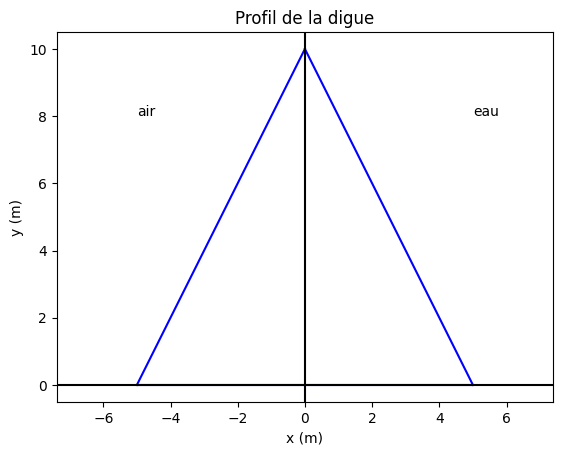

In [53]:
y = np.linspace(0, H, 1000)

plt.plot(fair(y), y, '-b') 
plt.plot(feau(y), y, '-b')  ## Décommenter après avoir codé la fonction feau(x)
 
plt.plot([xe, xa], [0, 0], '-b') # Bas de la digue
plt.xlabel('x (m)') 
plt.ylabel('y (m)')
plt.text(xe, 8, 'eau')
plt.text(xa, 8, 'air')
plt.axis('equal') # Permet d'avoir un plot isométrique
plt.axhline(0, color = "black")
plt.axvline(0, color = "black")
plt.xlim(-8, 8)
plt.title('Profil de la digue')
plt.show()

b. Pour le cas des fonctions affines, calculez la résultante (vectorielle ; il y a une composante suivant $x$ et une composante suivant $y$) des forces de pression côté eau. On prendra $x_a = -5$, $x_e = +5$, $H=10$.

### Définition de l'objet digue

In [54]:
class Digue:
    def __init__(self, f_eau, f_air, mu, H, rho_b=rho_b, rho_eau=rho_eau,):
        self.H = H
        self.mu = mu
        self.rho_b = rho_b
        self.rho_eau = rho_eau
        self.f_eau = f_eau
        self.f_air = f_air
        self.vol = None
        self.masse = None
        self.df_eau = central_df(self.f_eau, (0, H), 10000*H+1, include_start_end=True)

    def calc_volume(self):
        self.volume = np.abs(trap_integral(self.f_eau, (0, self.H), 1000)) + np.abs(trap_integral(self.f_air, (0, self.H), 1000))
        return self.volume
    
    def calc_masse(self):
        if self.vol is None:
            self.calc_volume()
        self.masse = self.volume * self.rho_b
        return self.masse

    def calc_poids(self):
        if self.masse is None:
            self.calc_masse()
        return - self.masse * g
    
    def calc_pression(self):
        integrand_x = lambda y: -self.rho_eau * g * (self.H - y)
        integrand_y = lambda y: (self.rho_eau * g * (self.H - y)) * self.df_eau[int(y * 10000 - 1)]
        px = trap_integral(integrand_x, (0, self.H), 1000)
        py = trap_integral(integrand_y, (0, self.H), 1000)
        return (px, py)
    
    def calc_resultante(self):
        px, py = self.calc_pression()
        return (px, py + self.calc_poids())
    
    def is_stable(self):
        f_tot_x, f_tot_y = self.calc_resultante()
        # T est la force tangentielle (donc la composante horizontale) et N provient du poids et
        # de la composante verticale de la pression.
        self.T_over_N = -f_tot_x / -f_tot_y
        return self.T_over_N < self.mu
    
    def __str__(self):
        is_stable, order = ("stable", "<=") if self.is_stable() else ("instable", ">")
        return f"La digue est {is_stable} car T/N = {self.T_over_N:.3f} {order} {self.mu}"

En rassemblant les formules on a:
$$\vec{P(y)} = \int_0^H \frac{\rho_e g (H-y) \cdot dy}{cos(tan^{-1}(f_{eau}'(y)))} \vec{n} =  \int_0^H \frac{\rho_e g (H-y) \cdot dy}{cos(tan^{-1}(\frac{-x_e}{H}))} \vec{n}  $$

En posant $theta = tan^{-1}(\frac{-x_e}{H})$ on a:

$$\vec{P(y)} =  \int_0^H \frac{\rho_e g (H-y) \cdot dy}{cos(\theta)} \vec{n}  $$

Suivant x:

$$P_x(y) = \int_0^H \frac{\rho_e g (H-y) \cdot dy \cdot (-cos(\theta))}{cos(\theta)} = - \rho_e g \int_0^H (H-y) \cdot dy =  \rho_e g (\frac{H^2}{2} - H)$$

Suivant y:

$$P_y(y) = \int_0^H \frac{\rho_e g (H-y) \cdot dy \cdot (sin(\theta))}{cos(\theta)} = \frac{-x_e}{H} \rho_e g \int_0^H (H-y)  \cdot dy =  x_e \rho_e g (\frac{H^2}{2} - H)$$

c. En supposant que la digue est en équilibre statique translationnel, calculez avec le principe fondamental de la dynamique les deux composantes (normale et tangentielle) de la force de réaction du sol, puis le rapport de ces composantes $T/N$. En considérant le coefficient de frottement roche/béton de 0.5, la digue est-elle en équilibre translationnel ?

PFD:

$$ N = - P_{oids} - P_x = g \rho_b  H x_e +  \rho_e g (\frac{H^2}{2} - H)$$

$$ T = - P_y = x_e \rho_e g (\frac{H^2}{2} - H)$$


$$\frac{T}{N} =  \frac{(\frac{H^2}{2} - H) x_e \rho_e g }{g \rho_b  H x_e + \rho_e g (\frac{H^2}{2} - H)} $$

### Verification et validation

In [55]:
digue = Digue(feau, fair, 0.5, H)

print(f"--OBJ-- le poids de la digue est {digue.calc_poids():.2e} N")
print(f"--OBJ-- la pression en x est {digue.calc_pression()[0]:.2e} N")
print(f"--OBJ-- la pression en y est {digue.calc_pression()[1]:.2e} N")
print(f"--OBJ-- {digue}")

def poids(g=g, H=H, rho_b=rho_b, x_e=xe, x_a=xa):
    return - g*H*rho_b*(x_e-x_a)/2

def pression_x(g=g, H=H, rho_eau=rho_eau):
    return -g*rho_eau*H**2/2

def pression_y(g=g, H=H, rho_eau=rho_eau, x_e=xe):
    return -g*x_e*rho_eau*H/2

T = - pression_x()
N = - (pression_y()  + poids())

print(f"le poids de la digue est {poids():.2e} N")
print(f"la pression en x est {pression_x():.2e} N")
print(f"la pression en y est {pression_y():.2e} N")
is_stable = T/N <= 0.5
print(f"la digue est {'stable' if is_stable else 'instable'}")
print(f"le rapport T/N est {T/N:.2e}")

--OBJ-- le poids de la digue est -1.47e+06 N
--OBJ-- la pression en x est -4.90e+05 N
--OBJ-- la pression en y est -2.45e+05 N
--OBJ-- La digue est stable car T/N = 0.286 <= 0.5
le poids de la digue est -1.47e+06 N
la pression en x est -4.90e+05 N
la pression en y est -2.45e+05 N
la digue est stable
le rapport T/N est 2.86e-01


d. Reprenez le calcul du rapport $T/N$ et du volume de béton en imposant $x_a=-5$ et $x_e=0$. La digue est-elle stable ?

In [56]:
def fair(y, H=H, xa=-5):
    return -(y - H) * xa / H

def feau(y, H=H, xe=0):
    return -(y-H) * xe/ H

print(Digue(f_eau=feau, f_air=fair, mu=0.5, H=H))

La digue est instable car T/N = 0.667 > 0.5


e. Reprenez le calcul avec $x_a=0$ et $x_e=+5$. Que constatez-vous ? Expliquez pourquoi la digue est stable dans un cas mais pas l'autre.

In [57]:
def fair(y, H=H, xa=0):
    return -(y - H) * xa / H

def feau(y, H=H, xe=5):
    return -(y-H) * xe/ H

print(Digue(f_eau=feau, f_air=fair, mu=0.5, H=H))

La digue est stable car T/N = 0.500 <= 0.5


La digue est stable dans ce cas car la pente est dans l'eau ce qui applique une force de pression sur la digue qui la pousse vers le sol ce qui la stabilise.

### Cas des digues convexes

On considère maintenant que l'interface entre l'eau et le béton n'est plus une fonction affine mais une fonction de la forme :

$$
f_{eau} (y)=a \left(\frac{y}{H}\right)^2-(a+x_e)\left(\frac{y}{H}\right) +x_e
$$


on donne également la dérivée :

$$
f'_{eau} (y)=\frac{2ay}{H^2}-\frac{a+x_e}{H}
$$

(on peut vérifier aisément que cette fonction relie bien les points de coordonées $[x_e,0]$ et $[0,H]$). Dans la suite nous prendrons $a=3$.

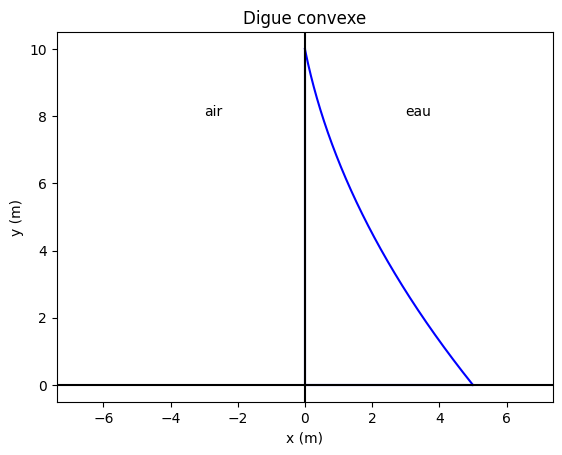

In [58]:
# Ce code permet d'afficher les courbes représentant la digue
H = 10
xe = 5
xa = 0

# On définit les fonctions côté eau et côté air, ici les courbes concaves
a = 3
def feau(y, H=H, xe=5, a=a):
    return a * (y / H) ** 2 - (a + xe) * (y / H) + xe
def fair(y, H=H, xa=0):
    return (H - y) * xa / H


# On crée un tableau de y
y = np.linspace(0, H, 1000)

# On trace
plt.plot(feau(y), y, '-b')
plt.plot(fair(y), y, '-b')
plt.plot([xe, xa], [0, 0], '-b')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.text(3, 8, 'eau')
plt.text(-3, 8, 'air')
plt.axis('equal') # Permet d'avoir un plot isométrique
plt.axhline(0, color = "black")
plt.axvline(0, color = "black")
plt.xlim(-8, 8)
plt.title("Digue convexe")
plt.show()

e. Calculez, pour $a=3$, $x_a=0$ et $x_e=5$, la résultante des forces de pression, le volume de béton, et le rapport $T/N$ dans l'hypothèse de l'équilibre statique. La digue est-elle en équilibre translationnel ?

In [ ]:
print(Digue(feau, fair, 0.5, H))

La digue est instable car T/N = 0.556 > 0.5


f. Reprenons le calcul avec $x_e=6$. La digue est-elle en équilibre ? Comparez avec le cas de la pente affine avec $x_a=0$ et $x_e=5$. Laquelle est la plus favorable ?

In [ ]:
def feau(y, H=H, xe=6, a=a):
    return a * (y / H) ** 2 - (a + xe) * (y / H) + xe
print(Digue(feau, fair, 0.5, H))

La digue est stable car T/N = 0.455 <= 0.5


g. Utilisez une boucle pour calculer le volume et le rapport $T/N$ en faisant varier $x_e$ dans l'intervalle $[5,6]$. On pourra ainsi tracer le rapport $T/N$ en fonction du volume. Déterminez graphiquement le volume minimal pour garder le rapport $T/N$ inférieur à 0.5 dans le cas courbe.

Une boucle permettant de faire varier xₑ dans un intervalle (ici [5,6]) permet de tracer T/N en fonction du volume de béton et de déterminer graphiquement le volume minimal pour que T/N < 0.5.

In [ ]:
xes = np.linspace(5, 6, 50)
T_over_N = np.zeros_like(xes)
vols = np.zeros_like(xes)
for i, xe_local in enumerate(xes):
    def feau(y, H=H, xe=xe_local, a=a):
        return a * (y / H) ** 2 - (a + xe) * (y / H) + xe
    digue_convex = Digue(feau, fair, 0.5, H)
    digue_convex.is_stable()
    T_over_N[i] = digue_convex.T_over_N
    vols[i] = digue_convex.volume

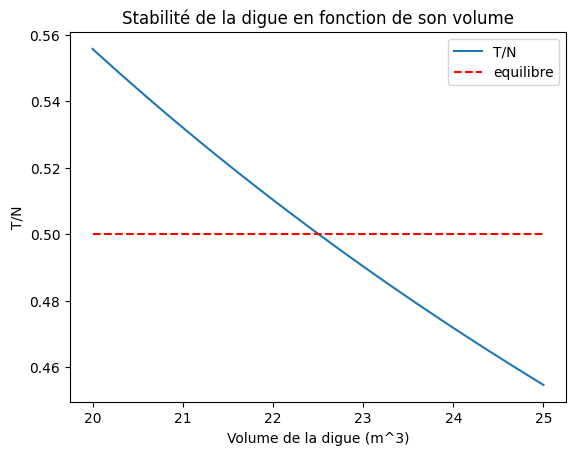

In [62]:
plt.plot(vols, T_over_N, label="T/N")
plt.plot(vols, np.ones_like(vols) * 0.5, '--r', label="equilibre")
plt.xlabel("Volume de la digue (m^3)")
plt.ylabel("T/N")
plt.title("Stabilité de la digue en fonction de son volume")
plt.legend()
plt.show()

h. Expliquez pourquoi la forme courbe de l'interface aide à réduire le volume de béton nécessaire à garder la digue en équilibre.

En fonction de la forme de la courbe de l'interface, le volume de beton nécessaire change. Si la courbe est convexe, la pression de l'eau sur la digue s'ajoute au poids de la digue ce qui rend le rapport T/N plus faible et donc la digue plus stable.

## Conclusion

On a vu dans ce projet comment calculer les forces de pression sur une digue de forme arbitraire, et comment déterminer si la digue est en équilibre statique. On a vu que la forme de la digue peut grandement influencer le volume de béton nécessaire pour garder la digue en équilibre.

## Parenthèse

Nous avons ici omis la deuxième équation d'équilibre statique : le théorème du moment cinétique (ou équilibre du moment des forces dans le cas statique).

Pour vérifier que la digue ne bascule pas sous la pression de l'eau, il faudrait en effet vérifier que le moment des forces qui s'applique à la digue soit nul.

Pour cela, il faudrait :

- trouver le point d'application du poids (le centre de gravité de la digue),
- calculer le moment du poids par rapport à un point,
- calculer la résultante du moment des forces de pression par rapport au même point,
- trouver le point d'application de la réaction du sol qui annule la somme des moments des forces (par rapport à un point quelconque) 
- vérifier que ce point d'application est bien situé quelque part entre la digue et le sol (sinon la digue bascule...)


